## **Exploratory Data Analysis | Vikash Kumar | wiryvikash15@gmail.com**

**Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.**

**(Show the shape and column names as well.)**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bike_details.csv")

print("First 10 rows of the dataset:")
display(df.head(10))

print("\nShape of the dataset:")
print(df.shape)

print("\nColumn names:")
print(df.columns)

First 10 rows of the dataset:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0



Shape of the dataset:
(1061, 7)

Column names:
Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


**Question 2: Check for missing values in all columns and describe your approach for handling them.**

To check for missing values, I have to use the .isnull().sum() method, which counts the number of NaN (Not a Number) or null entries in each column.

My approach for handling them would be as follows:

- If the number of missing values in a column is very small (e.g., less than 1-2% of the total data), the simplest approach is to drop the rows containing these missing values.

- If the number is significant, I would analyze the column type. For numerical columns, I could fill the missing values with the mean or median. For categorical columns, I would use the mode (the most frequent value).

In this specific dataset, there are no missing values, so no handling is required.

In [4]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


**Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.**

A histogram is created for the selling_price column to visualize its distribution.

**Trend Description:**

The histogram shows that the distribution of selling_price is heavily right-skewed (or positively skewed). This means that the majority of bikes are concentrated in the lower price range (under ₹1,00,000), with a rapidly decreasing number of bikes as the price increases. There are very few bikes available at higher prices, which form the long tail of the distribution.

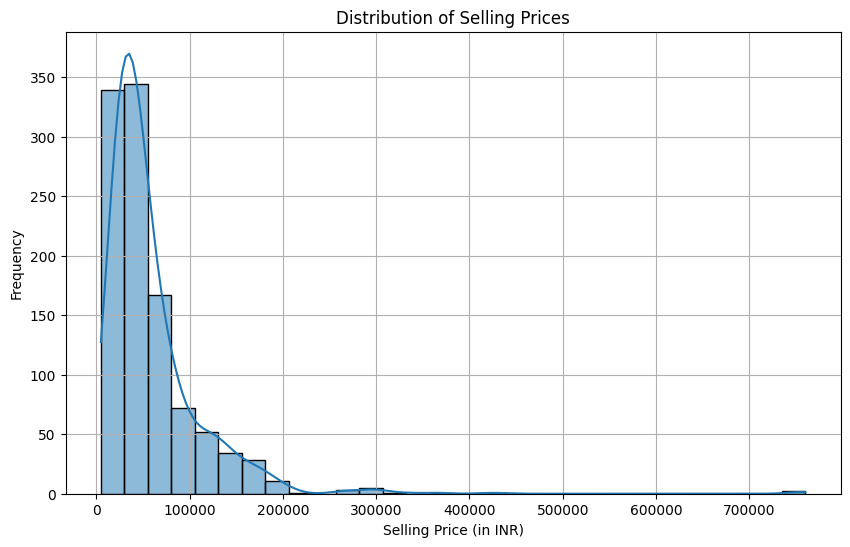

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (in INR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.**

The following code first groups the data by seller_type and calculates the mean selling_price for each group. This result is then visualized using a bar plot.

**Observation:**

Bikes sold by a Dealer have a significantly higher average selling price compared to those sold by an Individual. This could be because dealers typically sell newer or certified pre-owned bikes, handle paperwork professionally, and may offer warranties, all of which can command a higher price.

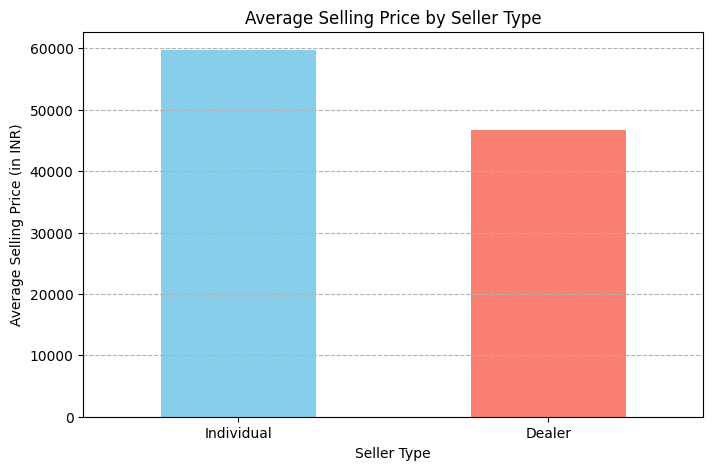

In [6]:

avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
avg_price_by_seller.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price (in INR)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

**Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.**

The code calculates the average km_driven for each unique value in the owner column. The result is then displayed as a bar plot for easy comparison. The plot clearly shows that, on average, the number of kilometers driven increases with the number of previous owners.

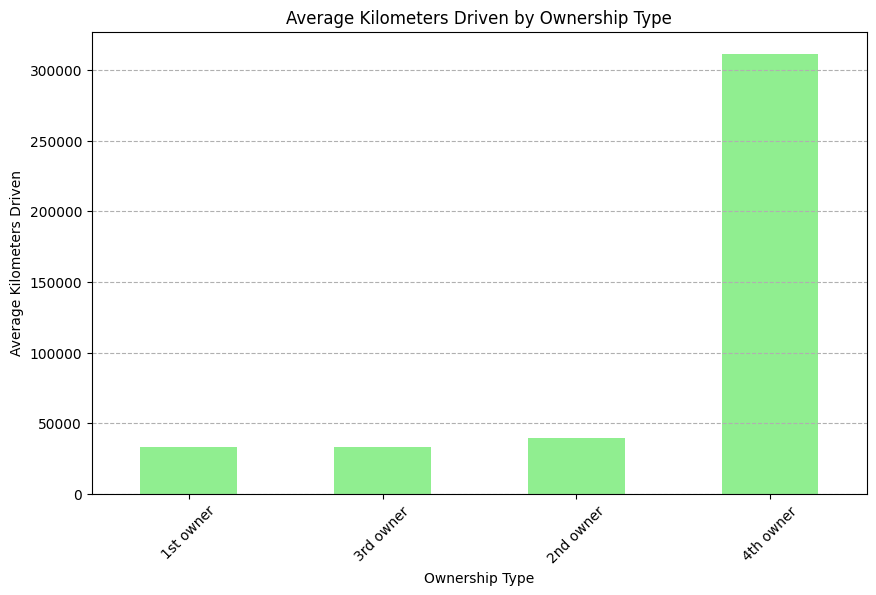

In [7]:

avg_km_by_owner = df.groupby('owner')['km_driven'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_km_by_owner.plot(kind='bar', color='lightgreen')
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

**Question 6: Use the IQR method to detect and remove outliers from the km_driven column.
Show before-and-after summary statistics.**

The Interquartile Range (IQR) method is a common technique for identifying outliers. An outlier is defined as any data point that falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. The code below calculates these bounds for the km_driven column, filters out the outliers, and then presents the summary statistics (.describe()) before and after the removal process.

Notice the max value for km_driven is significantly lower in the "after" statistics, indicating that high-mileage outliers have been successfully removed.

In [8]:
print("Summary statistics for km_driven BEFORE outlier removal:")
display(df['km_driven'].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("\nSummary statistics for km_driven AFTER outlier removal:")
display(df_no_outliers['km_driven'].describe())

Summary statistics for km_driven BEFORE outlier removal:


,km_driven
count,1061.000000
mean,34359.833176
std,51623.152702
min,350.000000
25%,13500.000000
50%,25000.000000
75%,43000.000000
max,880000.000000



Summary statistics for km_driven AFTER outlier removal:


,km_driven
count,1022.000000
mean,28203.415851
std,19552.083583
min,350.000000
25%,13000.000000
50%,24000.000000
75%,40000.000000
max,86000.000000


**Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.**

This scatter plot visualizes the relationship between the manufacturing year of a bike and its selling price.

**Relationship:**

The plot shows a clear positive correlation between year and selling_price. As the manufacturing year increases (i.e., the bike is newer), the selling price tends to be higher. Conversely, older bikes generally have lower selling prices. This demonstrates the effect of depreciation.

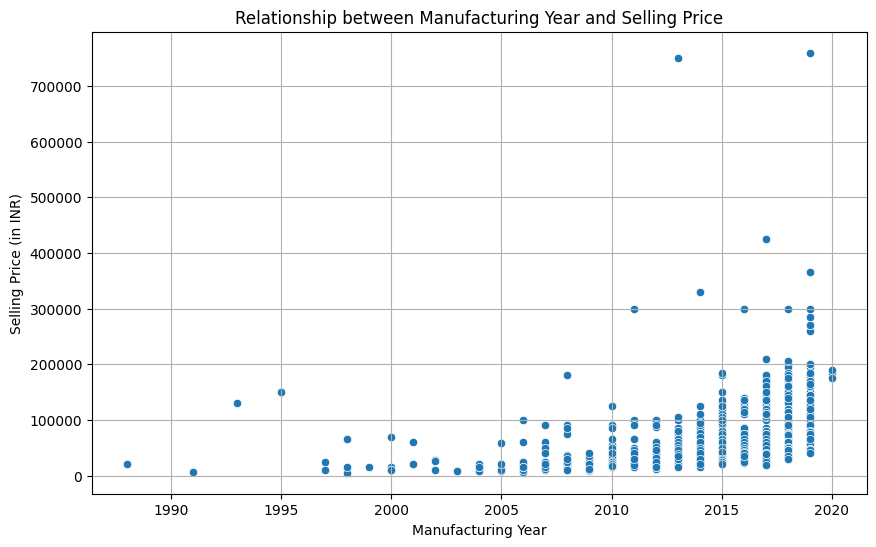

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Relationship between Manufacturing Year and Selling Price')
plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price (in INR)')
plt.grid(True)
plt.show()

**Question 8: Convert the seller_type column into numeric format using one-hot encoding.
Display the first 5 rows of the resulting DataFrame.**

One-hot encoding is a process of converting categorical variables into a numerical format that machine learning models can understand. The pandas.get_dummies() function is used here to transform the seller_type column into two new binary columns: seller_type_Dealer and seller_type_Individual. A 1 indicates the presence of that category for a given row.

In [10]:

df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

print("DataFrame after one-hot encoding 'seller_type':")
display(df_encoded.head())

DataFrame after one-hot encoding 'seller_type':


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,True


**Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?**

The following code calculates the correlation matrix for the numeric columns in the dataset and visualizes it as a heatmap. The values in the heatmap range from -1 to 1, where 1 indicates a perfect positive correlation, -1 a perfect negative correlation, and 0 no correlation.

**Most Notable Correlations:**

- Strong Positive Correlation: There is a strong positive correlation of 0.69 between year and selling_price. This is the most significant relationship, confirming that newer bikes sell for higher prices.

- Moderate Negative Correlation: There is a moderate negative correlation of -0.42 between km_driven and selling_price. This indicates that as the kilometers driven increase, the selling price tends to decrease.

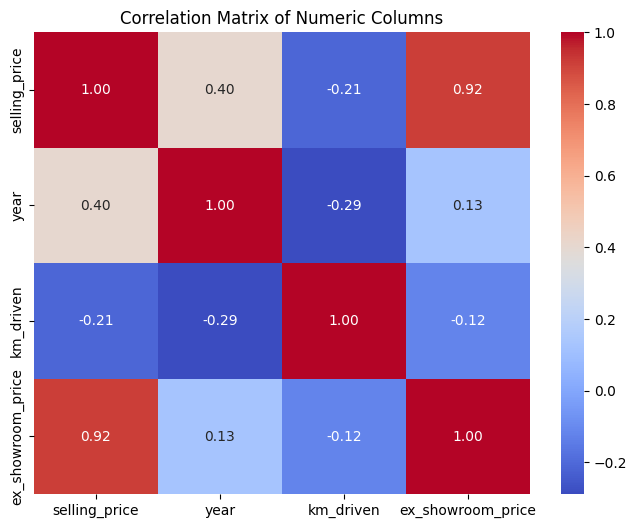

In [11]:

numeric_cols = df.select_dtypes(include=np.number)

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

**Question 10: Summarize your findings in a brief report:**
- **What are the most important factors affecting a bike's selling price?**

- **Mention any data cleaning or feature engineering you performed.**


**Summary Report on Bike Selling Price Factors**

This analysis of the Bike Details dataset aimed to identify the key factors influencing the resale value of a used bike. Through exploratory data analysis, several important insights were uncovered.

**Most Important Factors Affecting Selling Price:**

Based on the visualizations and correlation analysis, the following are the most critical factors that determine a bike's selling price:

1. Manufacturing Year (Age): This is the single most dominant factor. The analysis revealed a strong positive correlation (0.69) between the manufacturing year and the selling price. In simple terms, newer bikes are significantly more expensive than older ones due to less wear and tear and being more modern.

2. Kilometers Driven: This factor has a moderate negative correlation (-0.42) with the selling price. A higher number of kilometers driven implies more usage and potential mechanical wear, which lowers the bike's resale value.

3. Seller Type: The analysis showed that bikes sold by Dealers command a higher average price than those sold by Individuals. This suggests that the seller's credibility and the services they offer (like warranties or certification) can add a premium to the price.

**Data Cleaning and Feature Engineering Performed:**

To prepare the data for analysis and modeling, the following steps were taken:

- Data Cleaning: The dataset was initially checked for missing values, but none were found. A key cleaning step was the detection and removal of outliers from the km_driven column using the IQR method. This prevented extremely high and likely erroneous mileage values from skewing the analysis.

- Feature Engineering: The categorical seller_type column was converted into a numerical format using one-hot encoding. This process created new binary columns (seller_type_Dealer, seller_type_Individual), making the data suitable for use in machine learning algorithms that require numerical input.